### EXAMEN - Convocatoria 2 - Programación
Nombre: **Briam Sebastian Ramos Guevara**

Grupo: **A**

Utilizar el conjunto de datos "dataset_exam_C2.csv" para resolver el ejercicio.

#### 1) Carga de datos (0.5 puntos)
Cargar el dataframe "dataset_exam_C2.csv" y obtener por separado los datos "X" y la variable target "y"

In [60]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)

In [61]:
# Cargar el archivo "dataset_exam_C2.csv" utilizando la librería pandas
df = pd.read_csv('dataset_exam_C2.csv')
print("Datos iniciales: ")
print(df.head(), "\n")

# Convertir la información en formato numpy.array()
data_array = df.to_numpy()

# Separar los datos "X" y la variable target "y" (el target corresponde a la última columna)
X = data_array[:, :-1]
y = data_array[:, -1]


Datos iniciales: 
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 



#### 2) Tratamiento de datos (1 punto)
¡IMPORTANTE! Si este ejercicio no se consigue resolver, pasad directamente al siguiente cargando el dataset correspondiente.

In [62]:
# Discretizar los atributos relativos a variables categóricas, es decir, no numéricas.
categorical_indices = []
# Se recomienda utilizar la función "isinstance()" para saber si la variable es numérica o no.
for col_idx in range(X.shape[1]):
    # Tomamos un elemento cualquiera (el primero) para orientarnos
    sample_value = X[0, col_idx]
    # Verificamos si no es int/float/complex (o su variante np.number)
    if not isinstance(sample_value, (int, float, complex, np.number)):
        categorical_indices.append(col_idx)
# Se recomienda utilizar la función preprocessing.OrdinalEncoder() + "fit_transform() para realizar directamente la conversión.
encoder = OrdinalEncoder()

for col_idx in categorical_indices:
    # Extraemos la columna (array 1D)
    col_data = X[:, col_idx]

    # Convertimos a 2D (forma (n, 1))
    col_data_2d = np.expand_dims(col_data, axis=1)

    # Aplicamos el OrdinalEncoder
    col_encoded = encoder.fit_transform(col_data_2d)

    # "Aplanamos" de nuevo para asignar en X
    col_encoded = np.squeeze(col_encoded, axis=1)
    X[:, col_idx] = col_encoded

# Mostrar por pantalla cómo queda el dataset tras discretizar las variables categóricas
print("X discretizado (primeras 5 filas):\n", X[:5])
print("\nShape de X:", X.shape)
print("\ny (primeras 5 filas):\n", y[:5])


X discretizado (primeras 5 filas):
 [[19 0.0 27.9 0 1.0 3.0]
 [18 1.0 33.77 1 0.0 2.0]
 [28 1.0 33.0 3 0.0 2.0]
 [33 1.0 22.705 0 0.0 1.0]
 [32 1.0 28.88 0 0.0 1.0]]

Shape de X: (1338, 6)

y (primeras 5 filas):
 [16884.924 1725.5523 4449.462 21984.47061 3866.8552]


#### 3) Partición de datos externa (1 punto)
¡IMPORTANTE!  En caso de no haber realizado con éxito el ejercicio anterior, cargar primero el "dataset_backup.npy" utilizando "np.load()". Después, vuelve a separar los datos "X" y la variable target "y".

Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42).

In [63]:
# Partición hold-out seleccionado un 20% de los datos para test. Fijar semilla en 42.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# Mostrar por pantalla las dimensiones de los datos de train y test
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de X_test:",  X_test.shape)
print("Dimensiones de y_test:",  y_test.shape)


Dimensiones de X_train: (1070, 6)
Dimensiones de y_train: (1070,)
Dimensiones de X_test: (268, 6)
Dimensiones de y_test: (268,)


#### 4) Estandarización de los datos de train y test (1 punto)
Utilizar el método StandardScaler().

In [64]:
scaler = StandardScaler()
# Estandarización de los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Estandarización de los datos de test
X_test_scaled = scaler.transform(X_test)

# Muestra de los datos estandarizados
print("Dimensiones de X_train original:", X_train.shape)
print("Dimensiones de X_train escalado:", X_train_scaled.shape)
print("Dimensiones de X_test escalado: ", X_test_scaled.shape)


Dimensiones de X_train original: (1070, 6)
Dimensiones de X_train escalado: (1070, 6)
Dimensiones de X_test escalado:  (268, 6)


#### 5) Selección de atributos en train y test (1 punto)
Aplicar el método de mutual_info_regression utilizando la función "SelectPercentile" con percentile=90

In [65]:
selector = SelectPercentile(score_func=mutual_info_regression, percentile=90)

# Selección de los atributos de entrenamiento
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Selección de los atributos de test
X_test_selected = selector.transform(X_test_scaled)

# Mostrar por pantalla las dimensiones de los datos de train y test
print("Dimensiones de X_train_scaled original:", X_train_scaled.shape)
print("Dimensiones de X_train_selected:", X_train_selected.shape)

print("Dimensiones de X_test_scaled original: ", X_test_scaled.shape)
print("Dimensiones de X_test_selected:", X_test_selected.shape)


Dimensiones de X_train_scaled original: (1070, 6)
Dimensiones de X_train_selected: (1070, 5)
Dimensiones de X_test_scaled original:  (268, 6)
Dimensiones de X_test_selected: (268, 5)


#### 6) Comparación de modelos de regresión mediante validación cruzada (2.5 puntos)
Aplicar una validación cruzada interna de K=5 bolsas para optimizar y comparar la capacidad predictiva de los siguientes modelos: K-vecinos más cercanos (KNN) y Support Vector Machine (SVM). La comparación debe realizarse únicamente en términos de coeficiente de determinación (R2) proporcionando resultados de media +- desviación estándar.

In [66]:
# Definición de modelos
knn = KNeighborsRegressor()
svm = SVR()

# Definición de los hiperparámetros para GridSearch
param_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# GridSearchCV para KNN
knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=param_knn,
    scoring='r2',  # usamos R² como métr. de desempeño
    cv=5,
    n_jobs=-1
)
knn_cv.fit(X_train_selected, y_train)
print(f"Mejores hiperparámetros KNN: {knn_cv.best_params_}")
print(f"Mejor R² (KNN): {knn_cv.best_score_:.4f} ± {knn_cv.cv_results_['std_test_score'][knn_cv.best_index_]:.4f}")

# GridSearchCV para SVM
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=param_svm,
    scoring='r2',
    cv=5,
    n_jobs=-1
)
svm_cv.fit(X_train_selected, y_train)
print(f"Mejores hiperparámetros SVM: {svm_cv.best_params_}")
print(f"Mejor R² (SVM): {svm_cv.best_score_:.4f} ± {svm_cv.cv_results_['std_test_score'][svm_cv.best_index_]:.4f}")


Mejores hiperparámetros KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Mejor R² (KNN): 0.8072 ± 0.0460
Mejores hiperparámetros SVM: {'C': 10, 'kernel': 'linear'}
Mejor R² (SVM): 0.4077 ± 0.0320


#### 7) Evaluación de los modelos sobre el conjunto de test (1 punto)
- Definir una función "plot_bisectriz()" cuyos inputs sean:
 * "y" --> la variable target,
 * "y_pred" --> las predicciones del modelo, y
 * "name" --> el nombre del algoritmo utilizado.

- El output de dicha función será un gráfico basado en la bisectriz para ver las sobreestimaciones y subestimaciones de cada modelo

In [67]:
def plot_bisectriz(y_real, y_pred, name):

    plt.figure(figsize=(6,6))
    plt.scatter(y_real, y_pred, c='blue', edgecolor='k', alpha=0.6, label='Predicciones')

    # Línea bisectriz
    min_val = min(y_real.min(), y_pred.min())
    max_val = max(y_real.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Bisectriz')

    plt.title(f"Predicción vs Real - {name}")
    plt.xlabel("Valor Real (y)")
    plt.ylabel("Predicción (y_pred)")
    plt.legend()
    plt.show()

best_knn = knn_cv.best_estimator_
best_svm = svm_cv.best_estimator_

y_pred_knn = best_knn.predict(X_test_selected)
y_pred_svm = best_svm.predict(X_test_selected)

#### 8) Evaluación de los modelos sobre el conjunto de test (2 puntos)
- Entrenar los modelos anteriores utilizando todos los datos de entrenamiento.
- Evaluar su rendimiento sobre el conjunto de test.
- Llamar a la función "plot_bisectriz" para ver las sobreestimaciones y subestimaciones de cada modelo.
- Crear una tabla donde se muestren los resultados de todos los modelos.
 * Las filas serán: R2, MAE, MAPE, MSE y RMSE
 * Las columnas serán: KNN y SVM

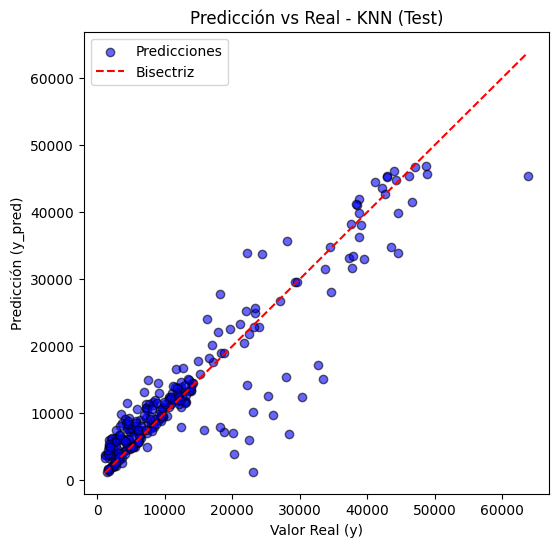

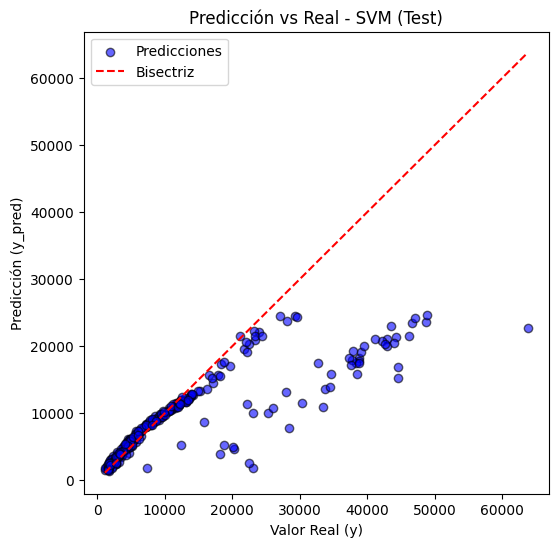

Tabla comparativa de métricas (Test):
                   KNN            SVM
R2              0.8537         0.5106
MAE          2846.6733      4206.9211
MAPE(%)        38.0500        22.0407
MSE      22706473.9504  75971374.4554
RMSE         4765.1311      8716.1559


In [68]:
# Creamos los mejores modelos con los hiperparámetros encontrados:
best_knn = knn_cv.best_estimator_
best_svm = svm_cv.best_estimator_

# Entrenar los modelos con todos los datos de entrenamiento
best_knn.fit(X_train_selected, y_train)
best_svm.fit(X_train_selected, y_train)

# Predicciones en Test
y_pred_knn = best_knn.predict(X_test_selected)
y_pred_svm = best_svm.predict(X_test_selected)

# Llamar a la función plot_bisectriz para ver el comportamiento
plot_bisectriz(y_test, y_pred_knn, "KNN (Test)")
plot_bisectriz(y_test, y_pred_svm, "SVM (Test)")

# Crear una tabla de resultados con R2, MAE, MAPE, MSE y RMSE para cada modelo
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn) * 100  # Expresado en %

r2_svm = r2_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
mape_svm = mean_absolute_percentage_error(y_test, y_pred_svm) * 100

# Construimos un DataFrame con las métricas (filas) y los modelos (columnas)
metricas = pd.DataFrame({
    'KNN': [r2_knn, mae_knn, mape_knn, mse_knn, rmse_knn],
    'SVM': [r2_svm, mae_svm, mape_svm, mse_svm, rmse_svm]
},
index=['R2', 'MAE', 'MAPE(%)', 'MSE', 'RMSE'])
metricas_formatted = metricas.map(lambda x: f"{x:.4f}")
print("Tabla comparativa de métricas (Test):")
print(metricas_formatted)

